# Introduction to Data Science - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\pette\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Load the dataframe.

In [2]:
population_df = pd.read_csv('../data/population_df.csv')
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,0.354232,0.227415,0.243374,0.058991,0.021659,0.094329,91,101,Vironniemen peruspiiri,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Filter only basic level districs.

In [3]:
population_df = population_df[~population_df['name'].str.contains('peruspiiri')]
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,91,102,Kalasatama,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Set distric code to index.

In [4]:
population_df = population_df.drop(['municipality', 'name'], axis=1)
population_df = population_df.set_index('code')
population_df.columns = population_df.columns.get_level_values(0)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


## Multicollinearity

Correlation of variables. Variables related to education.

In [5]:
educational_data = population_df.filter(regex='Education')
corr = educational_data.corr()

<AxesSubplot:>

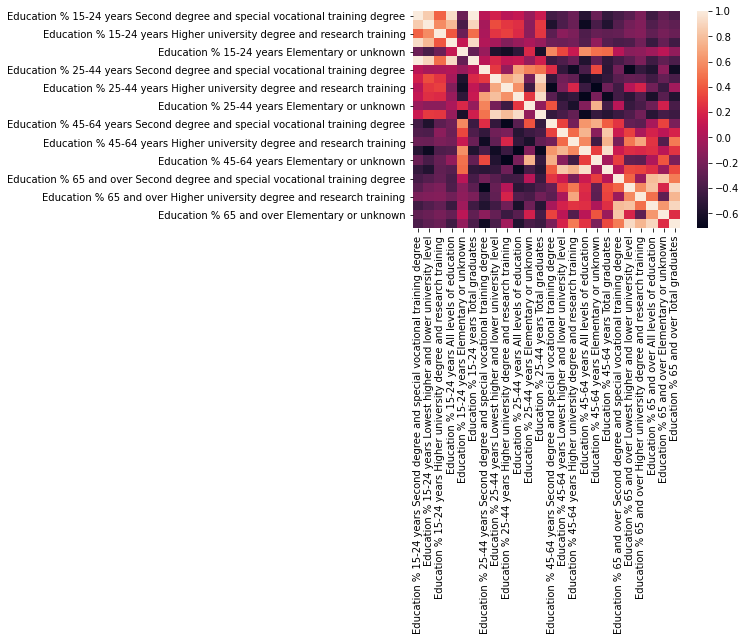

In [6]:
sns.heatmap(corr)

<AxesSubplot:>

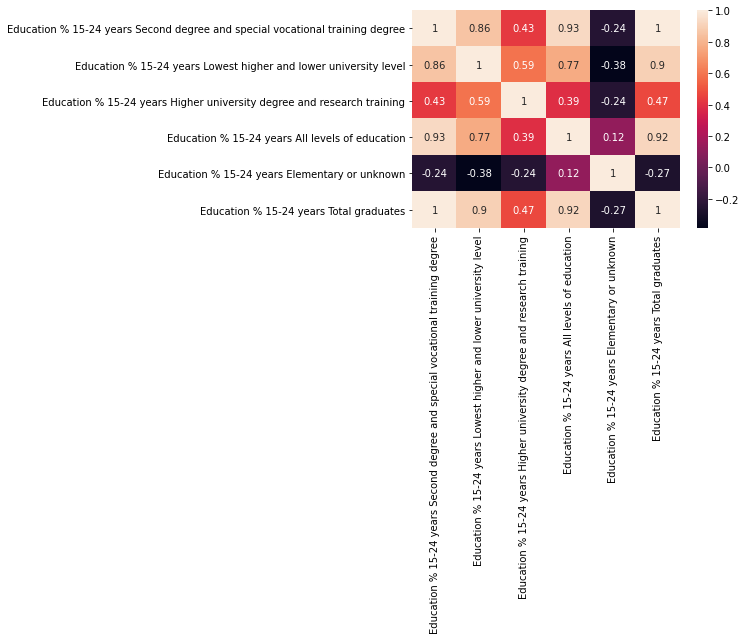

In [7]:
education_15_24 = educational_data.filter(regex='15')
corr = education_15_24.corr()
sns.heatmap(corr, annot=True)

Remove columns which show total graduates and all levels of education.

In [8]:
total_columns = [col for col in population_df.columns if 'Total' in col]
population_df = population_df.drop(columns=total_columns, axis=1)
all_levels_columns = [col for col in population_df.columns if 'All levels' in col]
population_df = population_df.drop(columns=all_levels_columns, axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

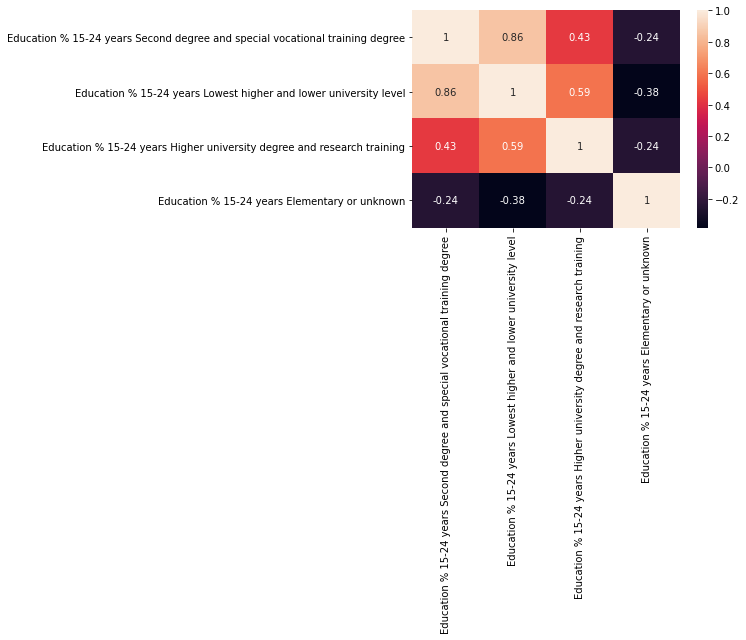

In [9]:
educational_data = population_df.filter(regex='Education % 15')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

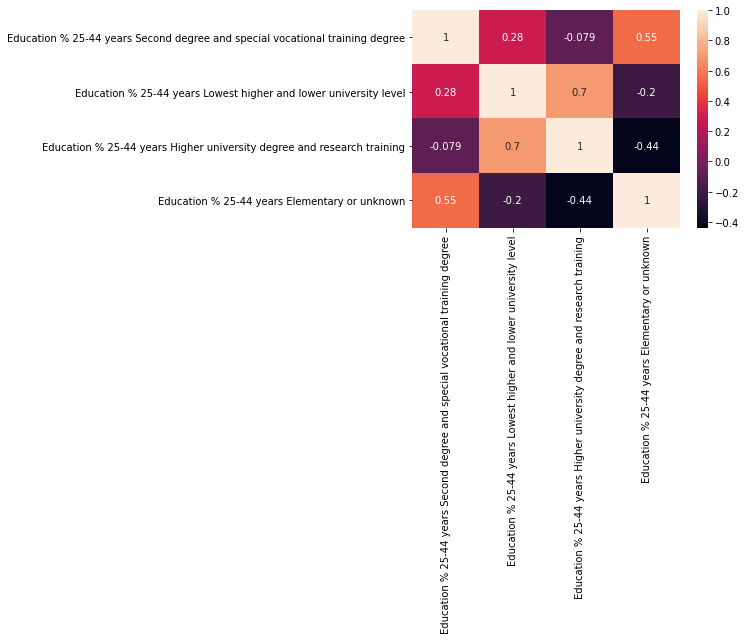

In [10]:
educational_data = population_df.filter(regex='Education % 25')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

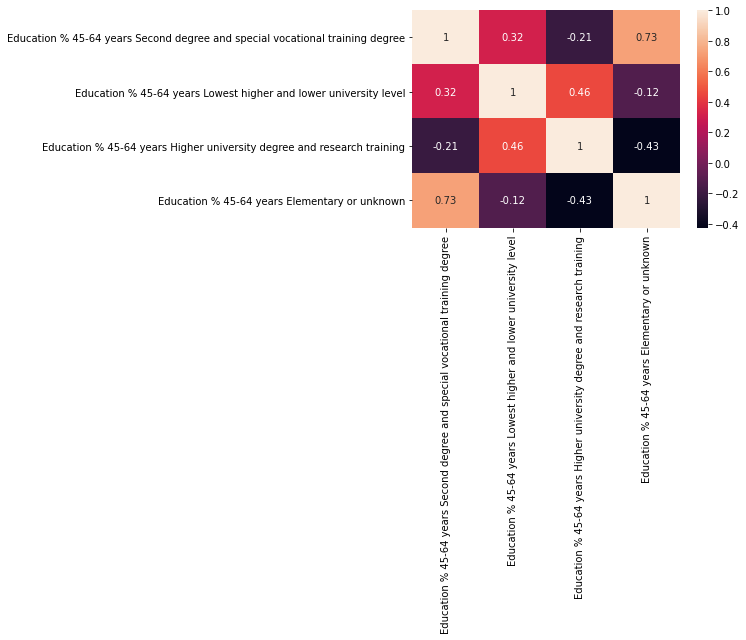

In [11]:
educational_data = population_df.filter(regex='Education % 45')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

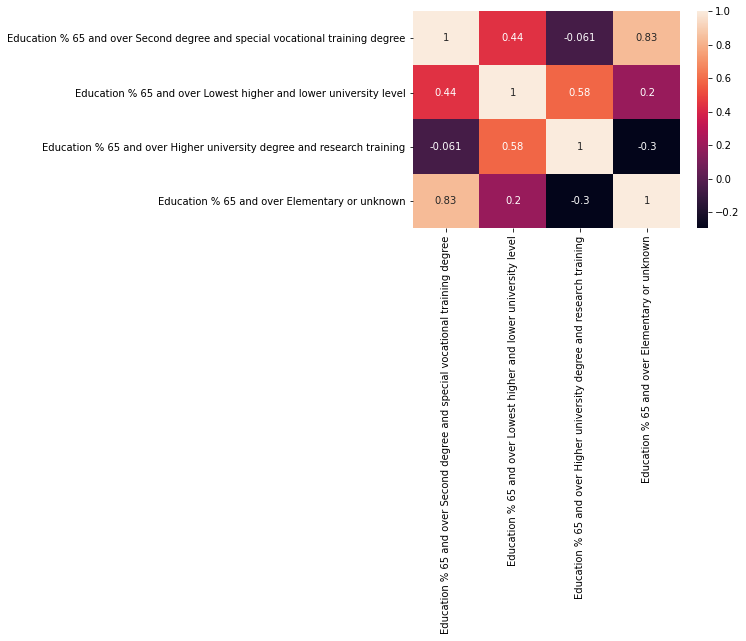

In [12]:
educational_data = population_df.filter(regex='Education % 65')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

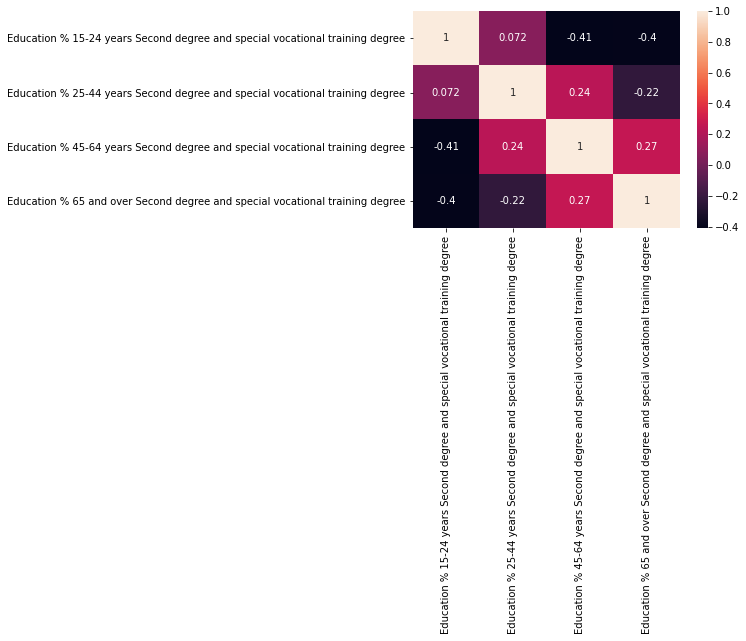

In [13]:
educational_data = population_df.filter(regex='Second degree')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

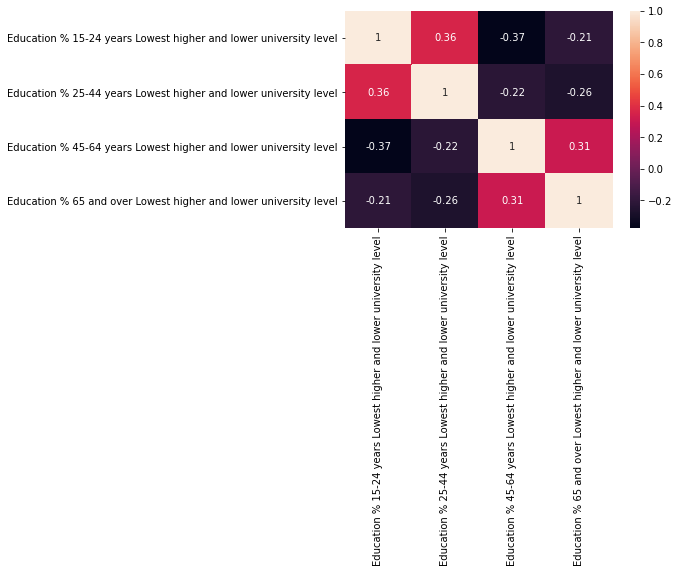

In [14]:
educational_data = population_df.filter(regex='Lowest higher')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

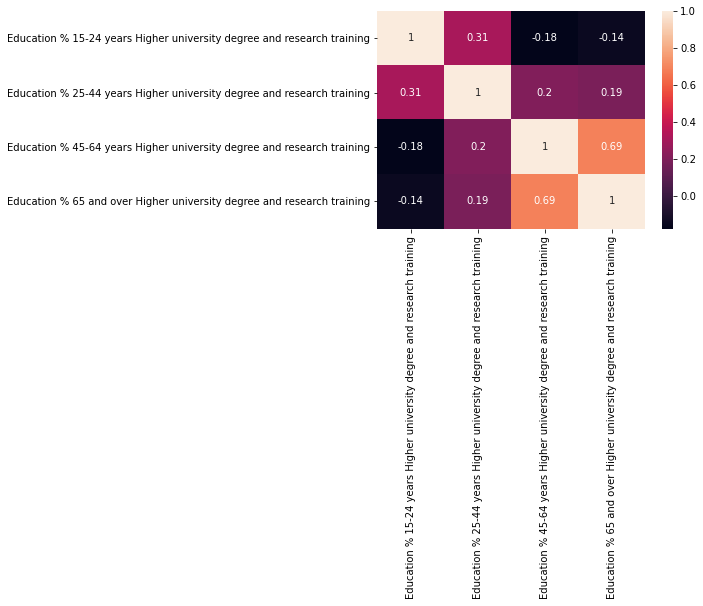

In [15]:
educational_data = population_df.filter(regex='Higher university')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

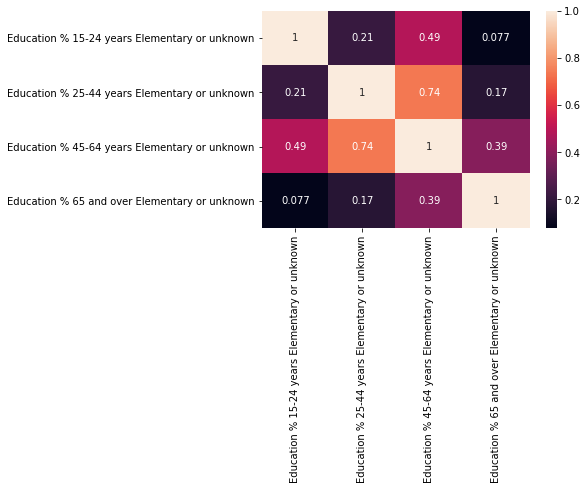

In [16]:
educational_data = population_df.filter(regex='Elementary')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

Correlation of other variables than educational variables.

In [17]:
educational_variables = population_df.filter(regex='Education')
other_variables = population_df.loc[:, ~population_df.columns.isin(educational_variables)]

<AxesSubplot:>

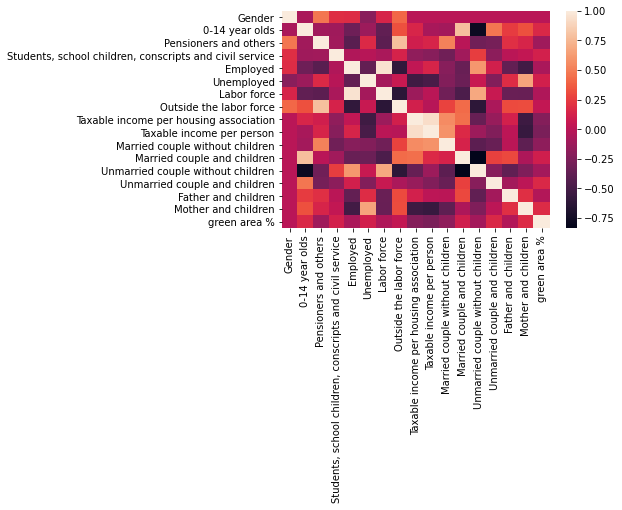

In [18]:
corr = other_variables.corr()
sns.heatmap(corr)

<AxesSubplot:>

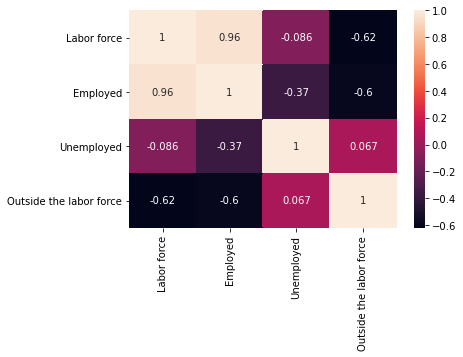

In [19]:
labor_force = population_df[['Labor force', 'Employed', 'Unemployed', 'Outside the labor force']]
corr = labor_force.corr()
sns.heatmap(corr, annot=True)

In [20]:
population_df = population_df.drop(columns=['Labor force'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

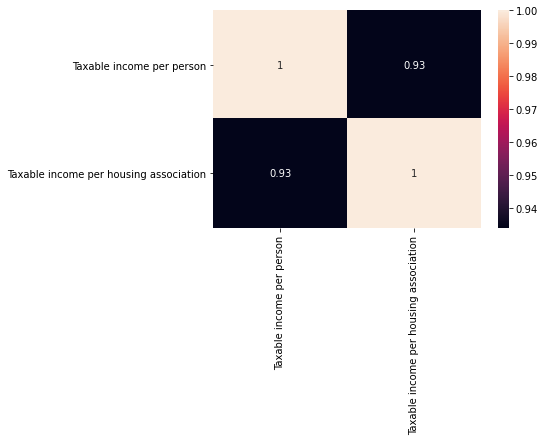

In [21]:
taxable_income = population_df[['Taxable income per person', 'Taxable income per housing association']]
corr = taxable_income.corr()
sns.heatmap(corr, annot=True)

In [22]:
population_df = population_df.drop(columns=['Taxable income per person'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Unemployed,Outside the labor force,Taxable income per housing association,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.020070,0.184111,81443.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.019652,0.232195,81443.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.036592,0.158090,48032.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.029017,0.200543,48032.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.017281,0.159760,71436.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.027448,0.265282,55559.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.027535,0.184181,62736.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.023280,0.221443,62736.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

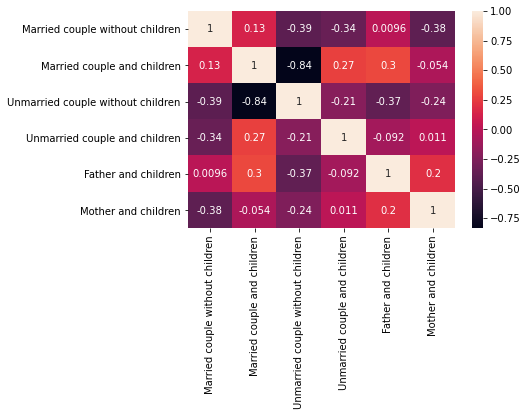

In [23]:
family_status = population_df[['Married couple without children',
                               'Married couple and children',
                               'Unmarried couple without children',
                               'Unmarried couple and children',
                               'Father and children',
                               'Mother and children']]
corr = family_status.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

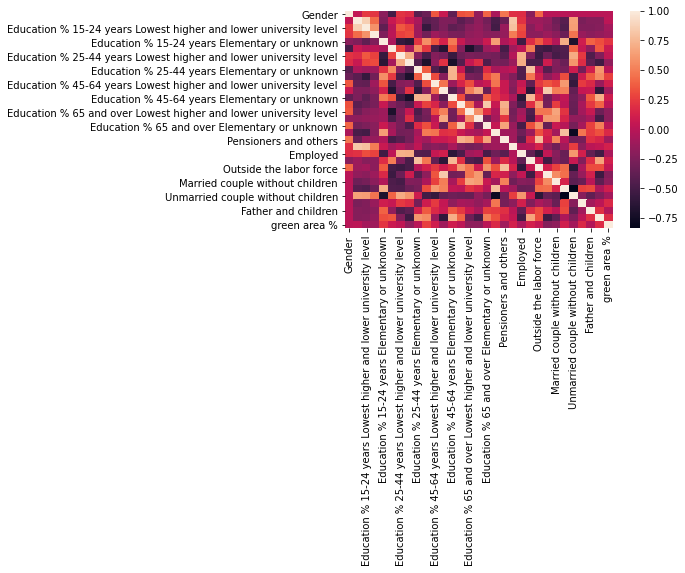

In [24]:
corr = population_df.corr()
sns.heatmap(corr)

## Linear Regression

In [25]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        300 non-null    int64  
 1   Education % 15-24 years Second degree and special vocational training degree  260 non-null    float64
 2   Education % 15-24 years Lowest higher and lower university level              260 non-null    float64
 3   Education % 15-24 years Higher university degree and research training        260 non-null    float64
 4   Education % 15-24 years Elementary or unknown                                 260 non-null    float64
 5   Education % 25-44 years Second degree and special vocational training degree  260 non-null    float64
 6   Education % 25-44 years Lowest hi

In [26]:
population_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.000000,1.000000
Education % 15-24 years Second degree and special vocational training degree,260.0,0.060723,0.057621,0.009709,0.039302,0.048488,0.066015,0.671958
Education % 15-24 years Lowest higher and lower university level,260.0,0.007551,0.009828,0.000000,0.002566,0.005017,0.009124,0.081416
Education % 15-24 years Higher university degree and research training,260.0,0.000457,0.000985,0.000000,0.000000,0.000000,0.000560,0.009524
Education % 15-24 years Elementary or unknown,260.0,0.063519,0.025806,0.017817,0.045282,0.060695,0.077927,0.185714
Education % 25-44 years Second degree and special vocational training degree,260.0,0.118993,0.039568,0.025862,0.089527,0.116775,0.145935,0.227190
Education % 25-44 years Lowest higher and lower university level,260.0,0.097523,0.039208,0.000000,0.072316,0.094002,0.121226,0.261261
Education % 25-44 years Higher university degree and research training,260.0,0.110606,0.051030,0.000000,0.068003,0.108947,0.147707,0.233236
Education % 25-44 years Elementary or unknown,260.0,0.059219,0.035769,0.004950,0.031735,0.052246,0.080047,0.275733
Education % 45-64 years Second degree and special vocational training degree,260.0,0.086567,0.030127,0.004545,0.064801,0.084627,0.106630,0.194030


In [27]:
population_df_all = population_df.ffill(axis=1)

In [28]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        300 non-null    int64  
 1   Education % 15-24 years Second degree and special vocational training degree  260 non-null    float64
 2   Education % 15-24 years Lowest higher and lower university level              260 non-null    float64
 3   Education % 15-24 years Higher university degree and research training        260 non-null    float64
 4   Education % 15-24 years Elementary or unknown                                 260 non-null    float64
 5   Education % 25-44 years Second degree and special vocational training degree  260 non-null    float64
 6   Education % 25-44 years Lowest hi

In [29]:
population_df_all = population_df_all.dropna()

In [30]:
population_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        300 non-null    float64
 1   Education % 15-24 years Second degree and special vocational training degree  300 non-null    float64
 2   Education % 15-24 years Lowest higher and lower university level              300 non-null    float64
 3   Education % 15-24 years Higher university degree and research training        300 non-null    float64
 4   Education % 15-24 years Elementary or unknown                                 300 non-null    float64
 5   Education % 25-44 years Second degree and special vocational training degree  300 non-null    float64
 6   Education % 25-44 years Lowest hi

In [31]:
target = population_df_all['green area %']
features = population_df_all.drop('green area %', axis=1)

In [32]:
features.columns

Index(['Gender',
       'Education % 15-24 years Second degree and special vocational training degree',
       'Education % 15-24 years Lowest higher and lower university level',
       'Education % 15-24 years Higher university degree and research training',
       'Education % 15-24 years Elementary or unknown',
       'Education % 25-44 years Second degree and special vocational training degree',
       'Education % 25-44 years Lowest higher and lower university level',
       'Education % 25-44 years Higher university degree and research training',
       'Education % 25-44 years Elementary or unknown',
       'Education % 45-64 years Second degree and special vocational training degree',
       'Education % 45-64 years Lowest higher and lower university level',
       'Education % 45-64 years Higher university degree and research training',
       'Education % 45-64 years Elementary or unknown',
       'Education % 65 and over Second degree and special vocational training degree',

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
model_all = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:           green area %   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.104
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.03e-06
Time:                        17:10:29   Log-Likelihood:                -1067.0
No. Observations:                 240   AIC:                             2196.
Df Residuals:                     209   BIC:                             2304.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [35]:
X_test = sm.add_constant(X_test)
y_pred = model_all.predict(X_test)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 17.35
Mean Squared Error: 469.46
R-squared: -0.19


## Feature selection

In [37]:
population_df_feature_selection = population_df.dropna()
population_df_feature_selection.isna().sum()

Gender                                                                          0
Education % 15-24 years Second degree and special vocational training degree    0
Education % 15-24 years Lowest higher and lower university level                0
Education % 15-24 years Higher university degree and research training          0
Education % 15-24 years Elementary or unknown                                   0
Education % 25-44 years Second degree and special vocational training degree    0
Education % 25-44 years Lowest higher and lower university level                0
Education % 25-44 years Higher university degree and research training          0
Education % 25-44 years Elementary or unknown                                   0
Education % 45-64 years Second degree and special vocational training degree    0
Education % 45-64 years Lowest higher and lower university level                0
Education % 45-64 years Higher university degree and research training          0
Education % 45-6

In [38]:
population_df_feature_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 111 to 80
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        142 non-null    int64  
 1   Education % 15-24 years Second degree and special vocational training degree  142 non-null    float64
 2   Education % 15-24 years Lowest higher and lower university level              142 non-null    float64
 3   Education % 15-24 years Higher university degree and research training        142 non-null    float64
 4   Education % 15-24 years Elementary or unknown                                 142 non-null    float64
 5   Education % 25-44 years Second degree and special vocational training degree  142 non-null    float64
 6   Education % 25-44 years Lowest hi

In [39]:
large_values = (population_df_feature_selection > 1e10).any()
print(large_values)

Gender                                                                          False
Education % 15-24 years Second degree and special vocational training degree    False
Education % 15-24 years Lowest higher and lower university level                False
Education % 15-24 years Higher university degree and research training          False
Education % 15-24 years Elementary or unknown                                   False
Education % 25-44 years Second degree and special vocational training degree    False
Education % 25-44 years Lowest higher and lower university level                False
Education % 25-44 years Higher university degree and research training          False
Education % 25-44 years Elementary or unknown                                   False
Education % 45-64 years Second degree and special vocational training degree    False
Education % 45-64 years Lowest higher and lower university level                False
Education % 45-64 years Higher university degree and r

In [40]:
is_infinite = np.isinf(population_df_feature_selection).any()
print(is_infinite)

Gender                                                                          False
Education % 15-24 years Second degree and special vocational training degree    False
Education % 15-24 years Lowest higher and lower university level                False
Education % 15-24 years Higher university degree and research training          False
Education % 15-24 years Elementary or unknown                                   False
Education % 25-44 years Second degree and special vocational training degree    False
Education % 25-44 years Lowest higher and lower university level                False
Education % 25-44 years Higher university degree and research training          False
Education % 25-44 years Elementary or unknown                                   False
Education % 45-64 years Second degree and special vocational training degree    False
Education % 45-64 years Lowest higher and lower university level                False
Education % 45-64 years Higher university degree and r

In [41]:
threshold = 2
outlier_mask = (abs(stats.zscore(population_df_feature_selection)) > threshold).any(axis=1)
population_df_feature_selection_no_outliers = population_df_feature_selection[~outlier_mask]

In [42]:
population_df_feature_selection_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 111 to 70
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        73 non-null     int64  
 1   Education % 15-24 years Second degree and special vocational training degree  73 non-null     float64
 2   Education % 15-24 years Lowest higher and lower university level              73 non-null     float64
 3   Education % 15-24 years Higher university degree and research training        73 non-null     float64
 4   Education % 15-24 years Elementary or unknown                                 73 non-null     float64
 5   Education % 25-44 years Second degree and special vocational training degree  73 non-null     float64
 6   Education % 25-44 years Lowest hig

In [43]:
target = population_df_feature_selection_no_outliers['green area %']
features = population_df_feature_selection_no_outliers.drop('green area %', axis=1)

In [44]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [46]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]), population_df_feature_selection_no_outliers.columns[i])

Feature 0: 1.211163 Gender
Feature 1: 0.041117 Education % 15-24 years Second degree and special vocational training degree
Feature 2: 0.322322 Education % 15-24 years Lowest higher and lower university level
Feature 3: 2.455921 Education % 15-24 years Higher university degree and research training
Feature 4: 0.005895 Education % 15-24 years Elementary or unknown
Feature 5: 1.532099 Education % 25-44 years Second degree and special vocational training degree
Feature 6: 1.710552 Education % 25-44 years Lowest higher and lower university level
Feature 7: 0.041666 Education % 25-44 years Higher university degree and research training
Feature 8: 0.023577 Education % 25-44 years Elementary or unknown
Feature 9: 0.482079 Education % 45-64 years Second degree and special vocational training degree
Feature 10: 0.097992 Education % 45-64 years Lowest higher and lower university level
Feature 11: 3.713529 Education % 45-64 years Higher university degree and research training
Feature 12: 0.558824

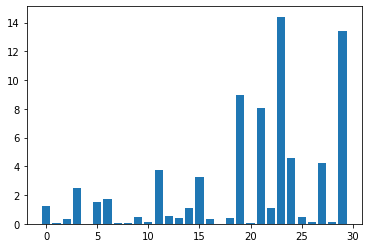

In [47]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

A bar chart of the feature importance scores for each input feature is created.
The plot clearly shows 8 features are a lot more important than the other features.

In [48]:
population_df_fs = population_df_feature_selection[['Education % 45-64 years Higher university degree and research training',
                                                    'Education % 65 and over Higher university degree and research training',
                                                    'Students, school children, conscripts and civil service',
                                                    'Unemployed',
                                                    'Taxable income per housing association',
                                                    'Married couple without children',
                                                    'Unmarried couple and children',
                                                    'Mother and children',
                                                    'green area %']]

In [49]:
target_fs = population_df_fs['green area %']
features_fs = population_df_fs.drop('green area %', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features_fs, target_fs, test_size=0.2, random_state=42)

In [51]:
model_fs = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model_fs.summary())

                            OLS Regression Results                            
Dep. Variable:           green area %   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.013
Date:                Wed, 18 Oct 2023   Prob (F-statistic):            0.00441
Time:                        17:10:29   Log-Likelihood:                -485.95
No. Observations:                 113   AIC:                             989.9
Df Residuals:                     104   BIC:                             1014.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [52]:
X_test = sm.add_constant(X_test)
y_pred = model_fs.predict(X_test)

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 16.61
Mean Squared Error: 428.55
R-squared: 0.07
